## Challenge 
[Click here pour plus de détails](https://www.kaggle.com/c/classification-data-challenge/data)

In [92]:
# import libs
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sub = pd.read_csv("submission.csv")
df_train.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


Class 0: 3859
Class 1: 248
Proportion: 15.56 : 1


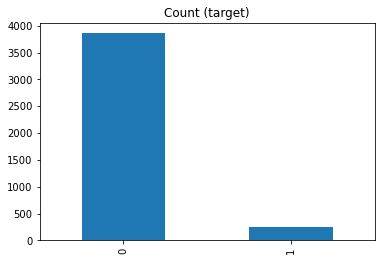

In [94]:
target_count =  df_train.iloc[:,-1].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [102]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [103]:
# Remove 'id' and 'target' columns
labels = df_train.columns[1:-1]

X = df_train[labels]
y = df_train['Buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\envs\Project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       772
           1       0.15      0.06      0.09        50

    accuracy                           0.92       822
   macro avg       0.55      0.52      0.52       822
weighted avg       0.89      0.92      0.91       822



#### Under Sampling


In [106]:
# Class count
count_class_0, count_class_1 = df_train.Buy.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Buy'] == 0]
df_class_1 = df_train[df_train['Buy'] == 1]

Random under-sampling:
0    248
1    248
Name: Buy, dtype: int64


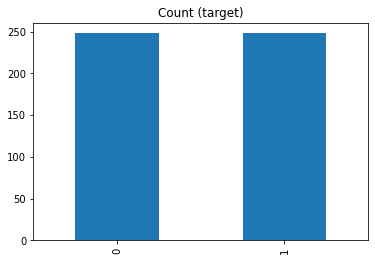

In [108]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Buy.value_counts())

df_test_under.Buy.value_counts().plot(kind='bar', title='Count (target)');

In [109]:
X = df_test_under[labels]
y = df_test_under['Buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\envs\Project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.63      0.66      0.65        50
           1       0.65      0.62      0.63        50

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [120]:
from imblearn.over_sampling import SMOTE

X = df_train[labels]
y = df_train['Buy']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print('SMOTE:')
y_sm.value_counts()

SMOTE:


0    3859
1    3859
Name: Buy, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm,
                                                    test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\envs\Project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       772
           1       0.97      0.96      0.97       772

    accuracy                           0.97      1544
   macro avg       0.97      0.97      0.97      1544
weighted avg       0.97      0.97      0.97      1544



In [117]:
df_sub.columns

Index(['Id', 'Predicted'], dtype='object')

In [124]:
labels

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52',
       'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
       'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
       'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82',
       'V83', 'V84', 'V85', 'V86'],
      dtype='object')

**Submission test**

In [125]:
X_sub = df_test[labels]
y_sub = df_sub['Predicted']

In [126]:
y_pred = model.predict(X_sub)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_sub, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.04      0.08      1715

    accuracy                           0.04      1715
   macro avg       0.50      0.02      0.04      1715
weighted avg       1.00      0.04      0.08      1715



C:\Users\user\anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scale Features
scaler = StandardScaler()

X = df_train[labels]
#X = scaler.fit_transform(X)
y = df_train['Buy']

n_dim = 50
pca = PCA(n_components=n_dim)
Xt= pca.fit_transform(X)

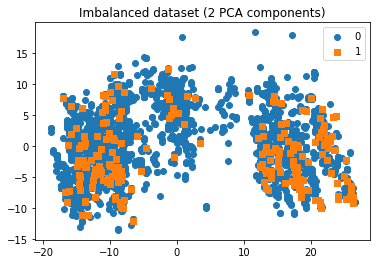

In [140]:
plot_2d_space(Xt, y, 'Imbalanced dataset (2 PCA components)')

**TODO**

In [74]:
from sklearn.decomposition import PCA
n_dim = 50
pca = PCA(n_components=n_dim)
Xt= pca.fit_transform(X)

pour présenter 90% d'inertie il faut  38


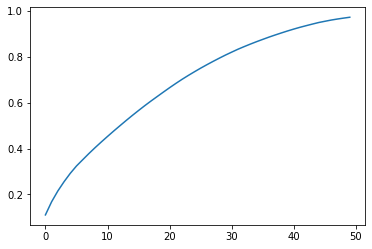

In [75]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
n_opt = np.argmax(np.cumsum(pca.explained_variance_ratio_)>.90)
print("pour présenter 90% d'inertie il faut ",n_opt)

In [76]:
X_train = Xt[:,:n_opt]

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [78]:
from sklearn.neighbors import KNeighborsClassifier

For k = 1  -- 0.890 (0.013)
For k = 2  -- 0.937 (0.004)
For k = 3  -- 0.929 (0.005)
For k = 4  -- 0.939 (0.003)
For k = 5  -- 0.937 (0.004)
For k = 6  -- 0.938 (0.003)
For k = 7  -- 0.939 (0.004)
For k = 8  -- 0.939 (0.002)
For k = 9  -- 0.939 (0.002)
For k = 10  -- 0.938 (0.002)
For k = 11  -- 0.938 (0.002)
For k = 12  -- 0.939 (0.001)
For k = 13  -- 0.939 (0.002)
For k = 14  -- 0.939 (0.001)
For k = 15  -- 0.939 (0.002)


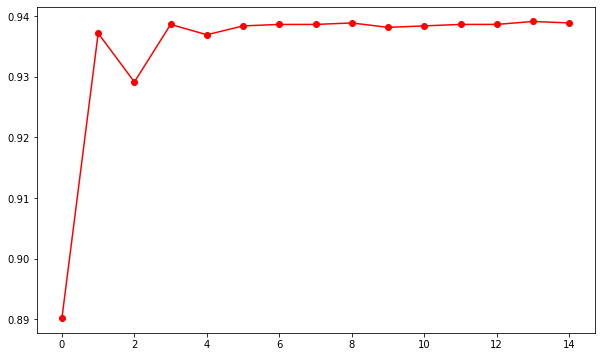

In [79]:
# Fit KNN

score = list() 
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y)

    n_cv = 10 # nombre de cross validation
    scores = cross_val_score(knn, X_train, y, cv=n_cv)
    print("For k = %d  -- %0.3f (%0.3f)" % (k, scores.mean(), scores.std()))
    score.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(score, 'ro-')

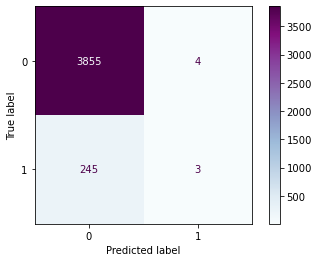

In [80]:
# Training set
y_hat=knn.predict(X_train)
cm = confusion_matrix(y, y_hat, labels=knn.classes_)
# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='BuPu')